# RQ1 Findings

## Introduction

Research Question 1 states:

***RQ1: How does large-language model use influence student learning performance?***

This question investigated the relationship between the quantity of participant sessions classified as “learning” and “task completion” from the D1 dataset and their midterm exam scores E1.

### Alternate Hypothesis for H1

The quantity and classification of participant sessions in the D1 dataset are significantly correlated with their midterm exam scores (E1). Specifically:

- There is a positive correlation between the quantity of sessions classified as “learning” and midterm exam scores.
- There is a negative correlation between the quantity of sessions classified as "task completion" and midterm exam scores.

### Null Hypothesis for H1

There is no statistically significant correlation between the quantity of participant sessions from the D1 dataset, whether classified as "learning" or "task completion," and their midterm exam scores (E1).

## Methodology

A **hierarchical multiple** regression analysis was employed to test the study hypotheses. This helped explain the contribution of each of the independent variables in addition to their collective impact on exam scores. The beta coefficients from the regression indicated the nature of the relationship such as positive or negative and the degree of influence of the independent variables. This strategy allows examination of each predictor's independent contribution before assessing their combined effects. This would help to reveal whether both variables provide unique information about the outcome. 

There are three models:

### Model 1 (E1 ~ Task completion Session Counts): 
E1 was regressed on task completion session count alone to establish the bivariate relationship.

### Model 2 (E1 ~ Learning Session Counts): 
E1 was regressed on learning session count alone to establish its bivariate relationship.

### Model 3 (E1 ~ Task Completion + Learning Session Counts): 

E1 was regressed simultaneously on both task completion session count and learning session count to examine their independent effects when controlling for one another.

For each model, I reported regression coefficients  (beta), standard errors, t-statistics, p-values, 95% confidence intervals, and overall model fit statistics (r-squared, adjusted r-squared, and F-statistic). Changes in r-squared across models were calculated to assess whether both predictors contributed unique variance beyond what either explained alone. 

Methodological analysis with respect to H1:

- The "learning" beta coefficient being positive with a p-value < 0.05, would indicate statistical significance. This implies there would be a positive correlation between the quantity of sessions classified as “learning” and midterm exam scores (E1).
- The “task completion” beta coefficient being negative with a p-value < 0.05 would imply a negative correlation between the quantity of sessions classified as "task completion" and midterm exam scores (E1).

Both conditions 1 and 2 must be satisfied to reject the null hypothesis for H1.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS

import seaborn as sns
from scipy import stats
import json
import import_ipynb
from IPython.display import display
# from analysis_with_ai import invoke_openrouter_ai, INTERACTION_PROMPT_TEMPLATEv2, classify_interaction
# from helper_functions import independent_ttest
from helper_functions import linear_regression_analysis, linear_regression_assumption_checks

In [3]:
# Read in the final data set
dataset = pd.read_csv("../datasets/dps-thesis-dataset.csv")
dataset.columns

Index(['participant_number', 'survey_done', 'chatbot_done', 'chatbot_group',
       'first_year', 'gender', 'year_in_school_simplified',
       'first_prog_course', 'C1', 'C2', 'E1', 'Difference_C2_C1',
       'inconclusive_session_count', 'learning_session_count',
       'task_completion_session_count', 'total_session_count',
       'total_interaction_count', 'interaction_to_session_ratio',
       'control_treatment_asnumber', 'first_prog_course_asnumber',
       'gender_asnumber', 'year_in_school_simplified_asnumber'],
      dtype='object')

## Regression Assumption Checks

Before conducting the hierarchical multiple regression analysis, several key assumptions were checked to ensure the validity of the results.

**Interpretation of Output**

Based on the regression assumption check output below the following observations were made:

- Assumptions met.
- There is a slight positive skew in the residuals, but it is not severe enough to violate the normality assumption. Likely due to the observations being smaller in number as the counts increase.
- This is evident in the regression plots as well. Makes sense as sessions distributions tend to be right-skewed. (lots of points with low counts, few with high counts)


--- Preparing Data for Linear Regression ---

Fitting model with standard OLS...
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     9.763
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000154
Time:                        18:11:27   Log-Likelihood:                -271.08
No. Observations:                  87   AIC:                             548.2
Df Residuals:                      84   BIC:                             555.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

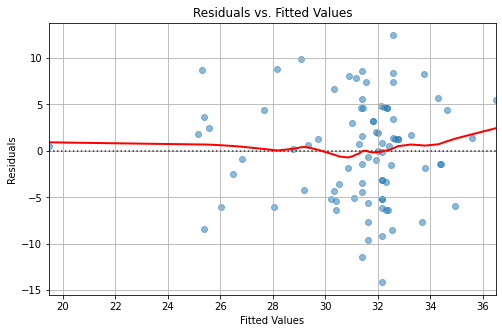

Interpretation of Residuals vs. Fitted Plot:
1. Linearity: The red line should be close to horizontal at 0. A curve indicates non-linearity.
2. Homoscedasticity: The points should be randomly scattered in a constant-width band. A funnel shape indicates heteroscedasticity.

--- ASSUMPTION 1: Linearity with Partial Regression Plots ---


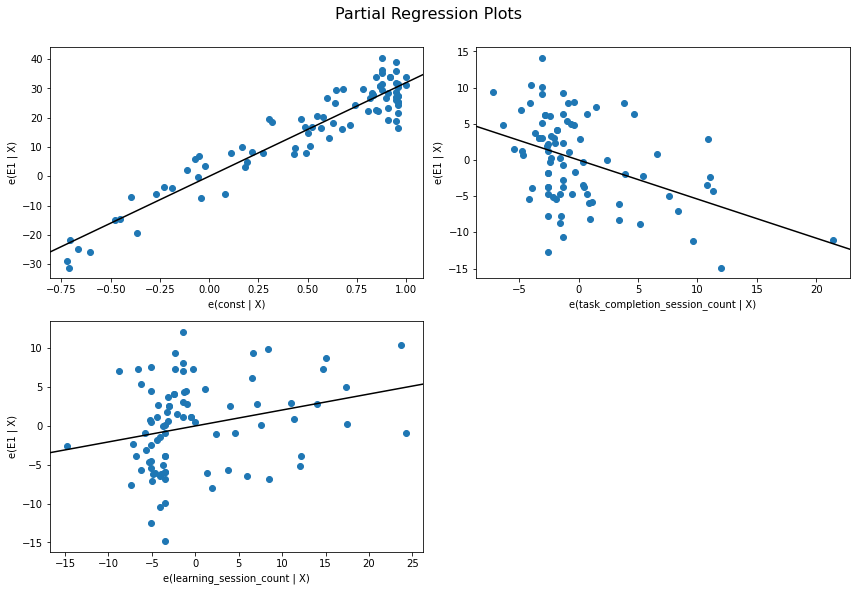

Interpretation: Each plot shows the relationship between y and one predictor,
holding other predictors constant. Look for a linear trend in each subplot.

--- ASSUMPTION 2: Homoscedasticity Test ---
✅ Breusch-Pagan Test: statistic=0.2862, p-value=0.8666
Interpretation of Breusch-Pagan Test:
 - p > 0.05 suggests homoscedasticity (constant variance)

--- ASSUMPTION 3: Checking Independence of Residuals (Autocorrelation) ---
✅ Durbin-Watson statistic: 2.09
Interpretation: The statistic ranges from 0 to 4.
- A value around 2.0 suggests no autocorrelation.
- Values < 1.5 suggest positive autocorrelation.
- Values > 2.5 suggest negative autocorrelation.

--- ASSUMPTION 4: Checking Normality of Residuals ---
✅ Shapiro-Wilk Test: statistic=0.9890, p-value=0.6785

Interpretation of Shapiro-Wilk Test:
 - p > 0.05 suggests residuals are normally distributed


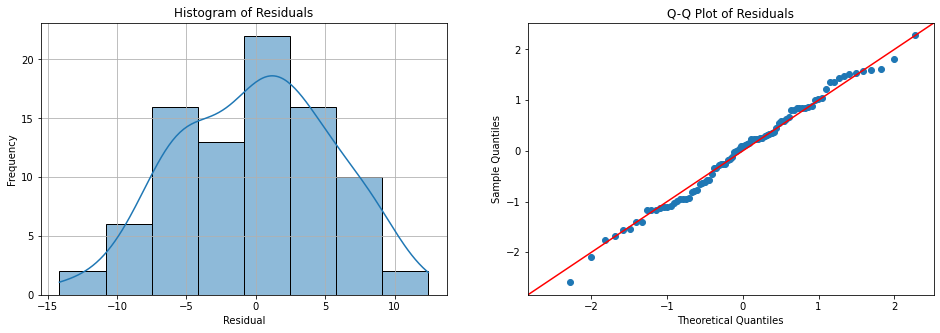

Interpretation:
1. Histogram: Should look like a bell curve.
2. Q-Q Plot: Points should fall along the 45-degree line.

--- ASSUMPTION 5: Checking for Multicollinearity ---
✅ VIF for task_completion_session_count: 1.1914
✅ VIF for learning_session_count: 1.1914

Interpretation of VIF:
- VIF = 1: No correlation
- 1 < VIF < 5: Moderate correlation, generally acceptable.
- VIF > 5 or 10: High correlation, indicating a multicollinearity problem.


In [4]:
ind_vars = ['task_completion_session_count', 'learning_session_count']
dep_var = "E1"

linear_regression_assumption_checks(dataset, ind_vars, dep_var)

### Model 1: E1 ~ Task Completion Session Counts

This section ran  regression for Model 1 as part of the hierarchical multiple regression analysis to examine the relationship between task completion session counts and midterm exam scores (E1).

**Interpretation of Output**

Based on the regression output below the following observations were made:

- Model meets statistical power assumptions, meeting target cohen's f-squared of 0.09 with power of 0.8 and alpha of 0.05. Actual cohen's f=squared is 0.1453
- Task Completion session counts was a significant negative predictor of E1  F(1,85) = 12.35, p-value= 0.001. Beta coeff = -0.41
- The model explained a significant portion of variance in E1 (r-squared = 0.127, Adjusted r-squared  = 0.117).
- For each additional task completion session count, midterm exam scores decreased by an average of 0.41 points, holding all else constant. (beta = -0.41, p < 0.01, stands error = 0.118), indicating that higher task completion session counts were associated with lower midterm exam scores.



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['task_completion_session_count']
DEPENDENT VAR  : E1
REGRESSORS     : 1
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     12.35
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000708
Time:                        18:11:27   Log-Likelihood:                -274.27
No. Observations:                  87   AIC:                             552.5
Df Residuals:                      85   BIC:                             557.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
   

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

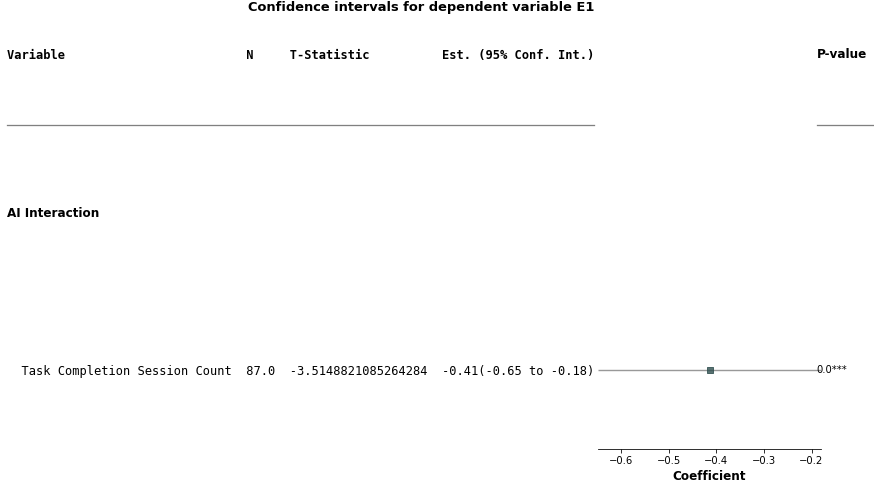

In [5]:
ind_vars = ['task_completion_session_count']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)

### Model 2: E1 ~ Learning Session Counts

This section ran regression for Model 2 as part of the hierarchical multiple regression analysis to examine the relationship between learning session counts and midterm exam scores (E1).

**Interpretation of Output**

Based on the regression output below the following observations were made:

- Model does not meet statistical power assumptions,  target cohen's f-squared of 0.0923 with power of 0.8 and alpha of 0.05. Actual cohen's f-squared is 0.0072
- Learning session counts was not a significant predictor of E1 F(1,85) = 0.61, p-value= 0.435. Beta coeff = 0.09
- Considered in isolation, learning session counts did not significantly predict midterm exam scores (r-squared = 0.007, Adjusted r-squared  = -0.005).



Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['learning_session_count']
DEPENDENT VAR  : E1
REGRESSORS     : 1
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6161
Date:                Mon, 06 Oct 2025   Prob (F-statistic):              0.435
Time:                        18:11:27   Log-Likelihood:                -279.86
No. Observations:                  87   AIC:                             563.7
Df Residuals:                      85   BIC:                             568.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

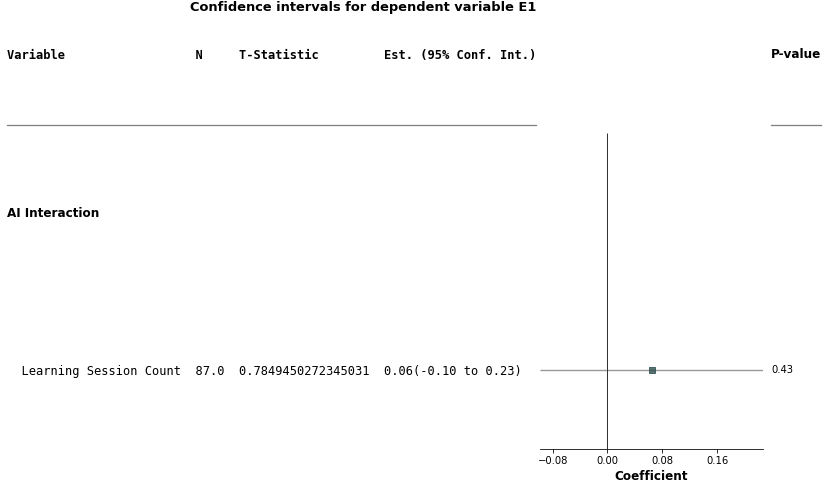

In [6]:
ind_vars = ['learning_session_count']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)

### Model 3: E1 ~ Task Completion Session Counts + Learning Session Counts

This section ran regression for Model 3 as part of the hierarchical multiple regression analysis to examine the relationship between task completion session counts, learning session counts, and midterm exam scores (E1).

**Interpretation of Output**

Based on the regression output below the following observations were made:

- The model meets statistical power assumptions, meeting target cohen's f-squared of 0.1148 with power of 0.8 and alpha of 0.05. Actual cohen's f-squared is 0.2325
- Full model was statistically significant F(2,84) = 9.763  p-value < 0.0002, explaining a significant portion of variance in E1 (r-squared = 0.189, Adjusted r-squared  = 0.169).
- Interestingly both independent variables became significant predictors of E1 when included together in the model and both effected where enhanced compared to their bivariate effects. Case in point:
    - Task Completion session counts: Beta coeff = -0.54, p-value < 0.000, std error = 0.125 ... an increase in effect size and significance compared to Model 1 (beta = -0.41). That is a 31% increase in effect size.
    - Learning session counts: Beta coeff = 0.2057, p-value = 0.013, std error = 0.081 ... a significant effect that was not present in Model 2. Beta coeff went from 0.0643 to 0.2057  This represnets a 219.91% increase in effect size.
- R-squared change from Model 1 to Model 3 was significant (delta r-squared = 0.189 - 0.127 = 0.062, p = 0.013), indicating that adding learning session counts provided unique explanatory power beyond task completion session counts alone. a 6% in variance explained.




Fitting model with standard OLS...
********************************************************************************
INDEPENDENT VAR: ['task_completion_session_count', 'learning_session_count']
DEPENDENT VAR  : E1
REGRESSORS     : 2
                            OLS Regression Results                            
Dep. Variable:                     E1   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     9.763
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           0.000154
Time:                        18:11:27   Log-Likelihood:                -271.08
No. Observations:                  87   AIC:                             548.2
Df Residuals:                      84   BIC:                             555.6
Df Model:                           2                                         
Covariance Type:            nonrobust                   

<Axes: xlabel='Coefficient', ylabel='Confidence intervals for dependent variable E1'>

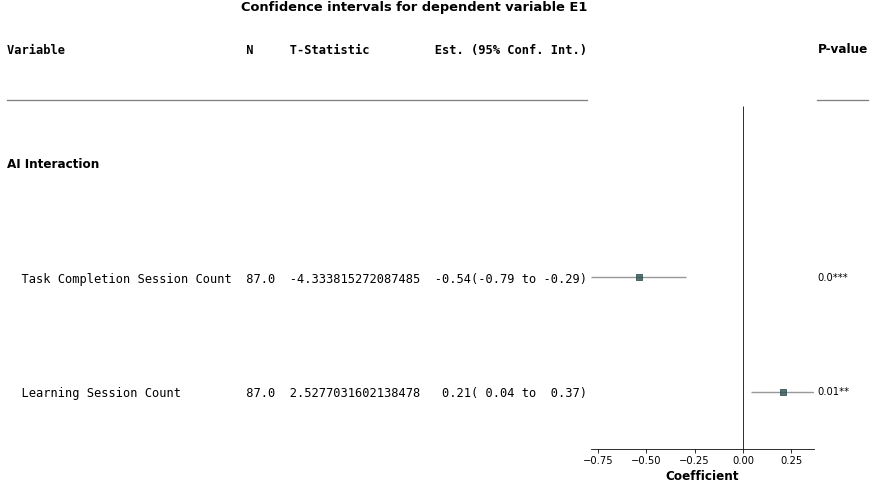

In [7]:
ind_vars = ['task_completion_session_count', 'learning_session_count']
dep_var = "E1"

linear_regression_analysis(dataset, ind_vars, dep_var)

## Summary of Findings

- There is a mutual supression effect between task completion session counts and learning session counts when predicting midterm exam scores (E1). The predictors share variance that obscures their individual relationships with the outcome when considered in isolation.
- Both variables become significant predictors of E1 when included together in the model, and both effects are enhanced compared to their bivariate effects.
- This suggests that students who engage in more task completion sessions tend to have fewer learning sessions and vice versa. 
- Since the effects are in opposition to one another, it suggests that they may be competing strategies for academic success. With task completion being being surface level engagement and learning being more constructive to metacognitive development. 
- The signficant negative relationship between task completion session counts and midterm exam scores (E1) indicates that students who focus more on task completion tend to perform worse on exams. This aligns with the idea that surface-level engagement is less effective for deep learning and retention.
- Conversely, the significant positive relationship between learning session counts and midterm exam scores (E1) suggests that students who engage more in learning-oriented sessions tend to perform better on exams. This supports
- The effect size for learning session counts is smaller than that for task completion session counts, indicating that while learning sessions positively impact exam performance, the detrimental effect of task completion sessions is more pronounced. 
- The small effect size for learning session counts may be due other confounding factors not accounted for in the model, such as prior knowledge, study habits, or external support such as tutoring, test anxiety, etc...
- MORE llm use isn't better there is a "right way" to use llms for learning.
